3.DATASET
The dataset for this paper has been obtained 
from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Automobile).

This data set consists of three types of entities: (a) the specification of an auto in terms of various 
characteristics, (b)its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky 
(or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process 
“symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized 
for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…),
and represents the average loss per car per year.

There are total 205 instances and 26 attributes out of which 15 are continuous, 1 is integer and 
10 are nominal. There are missing values as well.

## Complete Case Analysis


Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in **discarding** observations where values in **any** of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables in the dataset. 

### Which variables can I impute with CCA?

CCA can be applied to both categorical and numerical variables.


### Assumptions

CCA works well when the data are missing completely at random (MCAR). In fact, we should use CCA if we have reasons to believe that data is missing at random, and not otherwise. When data is MCAR, excluding observations with missing information is in essence the same as randomly excluding some observations from the dataset. Therefore the dataset after CCA is a fair representation of the original dataset. 


### Advantages

- Easy to implement
- No data manipulation required
- Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantages

- It can exclude a large fraction of the original dataset (if missing data is abundant)
- Excluded observations could be informative for the analysis (if data is not missing at random)
- CCA will create a biased dataset if the complete cases differ from the original data (e.g., when missing information is in fact MAR or NMAR and not missing at random).
- When using our models in production, the model will not know how to handle missing data

### When to use CCA

- Data is missing completely at random
- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible. However, as general guidance, if the total amount of missing data is ~5% of the original dataset or less, CCA is a viable option.

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option.

### CCA and models in production

When using CCA, we remove all observations that contain missing information. However, the data that we want to score with our model, may indeed contain missing information. This will pose a problem when using our model in live systems, or as we call it, when putting or models into production: when an observation contains missing data, the model will not be able to handle it. 

In order to avoid this problem, when putting models into production we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values by another number. We can choose any from the imputation techniques that we will discuss in the following lectures to replace NA in the data to be scored.


## USING THE BRAND (MAKE) INFORMATION TO FILL THE MISSING VALUES
WE USE A SIMILAR CAR FROM THE SAME BRAND (MAKE) TO FILL THE MISSING VALUE

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
# let's load the imports-85 automobile dataset
header_list = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
               'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 
               'length', 'width','height', 'curb-weight', 'engine-type', 'num-of-cylinders',
               'engine-size', 'fuel-system','bore', 'stroke', 'compression-ratio', 
               'horsepower', 'peak-rpm','city-mpg', 'highway-mpg', 'price']
data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\automobile data set\\imports-85 - data.txt', names = header_list)


In [3]:
# let's inspect the first 5 rows
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
data = data.replace('?', np.nan)

In [5]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
data.to_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\automobile data set\\imports-85 - data.csv')

In [7]:
#TRANSFORMING TYPE OF DATA TO FLOAT IN ORDER TO PLOT THEM LATER

data['normalized-losses'] = data['normalized-losses'].astype(float)

data['bore'] = data['bore'].astype(float)

data['stroke'] = data['stroke'].astype(float)

data['horsepower'] = data['horsepower'].astype(float)

data['peak-rpm'] = data['peak-rpm'].astype(float)

data['price'] = data['price'].astype(float)

In [8]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe

data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are: 41 missing values for normalized-losses, 2 for num-of-doors, 4 for bore, 
4 for stroke, 2 for horsepower, 2 for peak-rpm and 4 for price.
    

In [9]:
# alternatively, we can use the mean method after isnull
# to visualise the percentage of
# missing values for each variable

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

# percentage of missing values for each variable

data_na = data[vars_with_na].isnull().mean()
data_na = pd.DataFrame(data_na.reset_index())

#adding columns to the dataframe
data_na.columns = ['Features', 'na_percentage_*100']
data_na['na_percentage_*100']= data_na['na_percentage_*100']*100

data_na.sort_values(by = 'na_percentage_*100', ascending = False, inplace = True)

In [10]:
data_na

,Features,na_percentage_*100
0,normalized-losses,20.00000
2,bore,1.95122
3,stroke,1.95122
6,price,1.95122
1,num-of-doors,0.97561
4,horsepower,0.97561
5,peak-rpm,0.97561


There are: 20% missing values for normalized-losses, 1% for num-of-doors, 2% for bore, 
2% for stroke, 1% for horsepower, 1% for peak-rpm and 2% for price.

The first variable contain a lot of missing information. So we can't use CCA if we consider this variable, as most of the observations in the dataset will be discarded. We could otherwise use CCA if we omit using those variables with a lot of NA.

I will ignore the first variable with a lot of missing data, and proceed with CCA in the remaining of the dataset.

In [11]:
# capture variables with no or less than 5% NA

vars_cca = [var for var in data.columns if data[var].isnull().mean() < 0.05]
vars_cca

['symboling',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [24]:
len(data[vars_cca].dropna())

193

In [12]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables

# the method dropna(), discards the observations that contain
# na in any of the rows / columns

len(data[vars_cca].dropna()) / len(data)

0.9414634146341463

In [13]:
# create the complete case dataset
# in other words, remove observations with na in any variable

data_cca = data[vars_cca].dropna()
data.shape, data_cca.shape

((205, 26), (193, 25))

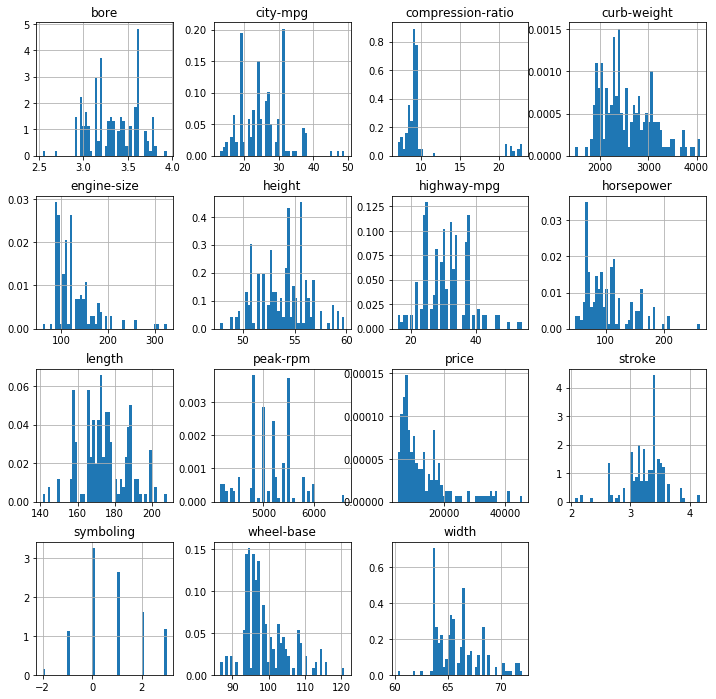

In [14]:
# plot the histograms for all numerival variables in the complete
# case dataset

data_cca.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

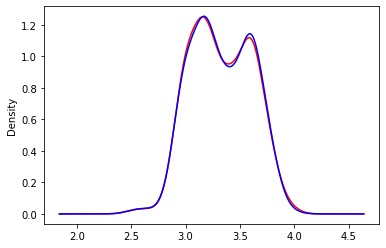

In [15]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['bore'].plot.density(color='red')

# data after cca
data_cca['bore'].plot.density(color='blue')

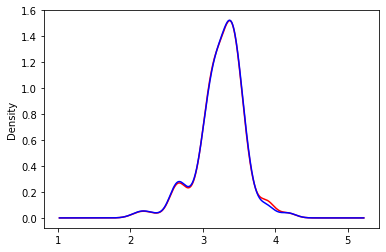

In [16]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['stroke'].plot.density(color='red')

# data after cca
data_cca['stroke'].plot.density(color='blue')

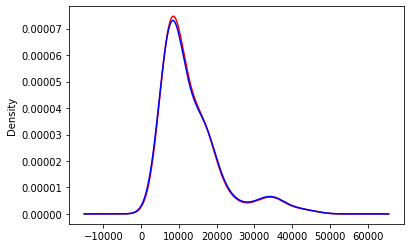

In [17]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['price'].plot.density(color='red')

# data after cca
data_cca['price'].plot.density(color='blue')

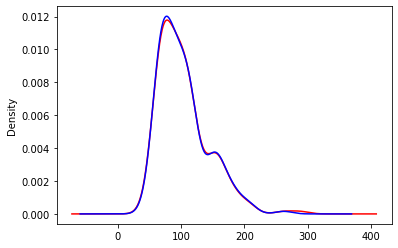

In [18]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['horsepower'].plot.density(color='red')

# data after cca
data_cca['horsepower'].plot.density(color='blue')

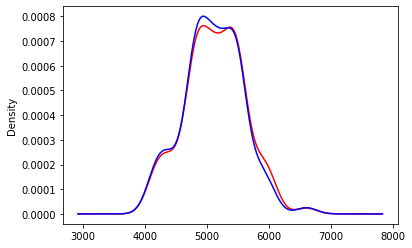

In [19]:
## let's check the distribution of a few variables before and after 
# cca: density plot

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['peak-rpm'].plot.density(color='red')

# data after cca
data_cca['peak-rpm'].plot.density(color='blue')

As we can see from the above plots, the distribution of the selected numerical variables in the original and complete case dataset is very similar, which is what we expect from CCA if data is missing at random and only for a small proportion of the observations.

In the next cells I will explore the distribution of categorical variables. To do so, I will evaluate the percentage of observations that show each of the unique categories, as we did in sections 2 and 3 of the course.

In [20]:
# the following function captures the percentage of observations
# for each category in the original and complete case dataset
# and puts them together in a new dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [21]:
# run the function in a categorical variable
categorical_distribution(data, data_cca, 'num-of-doors')

,original,cca
four,0.556098,0.580311
two,0.434146,0.419689


In [22]:
# run the function in a categorical variable
categorical_distribution(data, data_cca, 'num-of-cylinders')

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,original,cca
eight,0.024390,0.020725
five,0.053659,0.051813
four,0.775610,0.792746
six,0.117073,0.124352
three,0.004878,0.005181
twelve,0.004878,0.005181
two,0.019512,NaN


In [23]:
# run the function in a categorical variable
categorical_distribution(data, data_cca, 'fuel-system')

C:\Users\gusal\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,original,cca
1bbl,0.053659,0.056995
2bbl,0.321951,0.331606
4bbl,0.014634,NaN
idi,0.097561,0.098446
mfi,0.004878,0.005181
mpfi,0.458537,0.455959
spdi,0.043902,0.046632
spfi,0.004878,0.005181


As we can see from the output of the cells above, the distribution of automobiles in each of the categories, is very similar in the original and complete case dataset, which again, is what is expected if the data is missing completely at random, and the percentage of missing data is small.